In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

In [2]:
#step1: load the dataset

In [3]:
data = pd.read_csv("C:\\Users\\NARESH\\Downloads\\New folder (3)\\houseprediction1.csv")
data.isnull().sum()
data.drop(['sqft_above'],axis='columns',inplace=True)
conv_dates=[1 if values==2014 else 0 for values in data.date]

In [4]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [6]:
y=data[['price']].values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [7]:
#step3:split the data into train and test data

In [8]:
x=data.drop(['id','date'], axis=1).values

In [9]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2)
print(x_train)
print(x_test)

[[ 7.29000e+05  3.00000e+00  1.50000e+00 ... -1.22370e+02  2.65000e+03
   3.02800e+04]
 [ 2.29000e+05  2.00000e+00  1.00000e+00 ... -1.22343e+02  1.50000e+03
   5.10000e+03]
 [ 3.06500e+05  2.00000e+00  1.00000e+00 ... -1.22344e+02  1.90000e+03
   1.64000e+04]
 ...
 [ 7.39999e+05  4.00000e+00  2.75000e+00 ... -1.22027e+02  2.96000e+03
   6.97000e+03]
 [ 5.05000e+05  3.00000e+00  2.00000e+00 ... -1.22385e+02  1.55000e+03
   5.00000e+03]
 [ 4.07450e+05  3.00000e+00  2.00000e+00 ... -1.21967e+02  1.42000e+03
   1.19820e+04]]
[[ 9.35100e+05  4.00000e+00  3.50000e+00 ... -1.22172e+02  1.64000e+03
   8.50600e+03]
 [ 5.58000e+05  4.00000e+00  2.25000e+00 ... -1.22174e+02  2.06000e+03
   9.67600e+03]
 [ 2.15000e+05  4.00000e+00  1.50000e+00 ... -1.22383e+02  1.39000e+03
   7.80000e+03]
 ...
 [ 2.52500e+05  3.00000e+00  2.00000e+00 ... -1.22352e+02  1.90000e+03
   6.08600e+03]
 [ 3.59000e+05  3.00000e+00  2.25000e+00 ... -1.22195e+02  1.95000e+03
   1.96800e+03]
 [ 4.00000e+05  2.00000e+00  1.0

In [10]:
#step4:choose the regression model and fit the model

In [11]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [12]:
print(x_train.shape)

(17290, 18)


In [13]:
print(y_train.shape)

(17290, 1)


In [14]:
print(x_test.shape)
print(y_test.shape)

(4323, 18)
(4323, 1)


In [15]:
y_predict=model.predict(x_test)
print(y_predict)
print(y_test)

[[935100.]
 [558000.]
 [215000.]
 ...
 [252500.]
 [359000.]
 [400000.]]
[[935100.]
 [558000.]
 [215000.]
 ...
 [252500.]
 [359000.]
 [400000.]]


In [16]:
#step5:determine the performance of the model using suitable metric

In [17]:
print('coefficient of determination :%.3f' % r2_score(y_test,y_predict))

coefficient of determination :1.000


Text(0.5, 1.0, 'Price vs Square Feet')

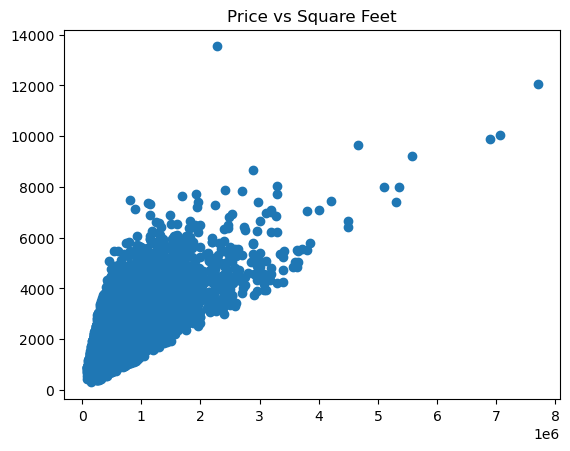

In [18]:
plt.scatter(data.price,data.sqft_living)
plt.title("Price vs Square Feet")

<Axes: xlabel='floors'>

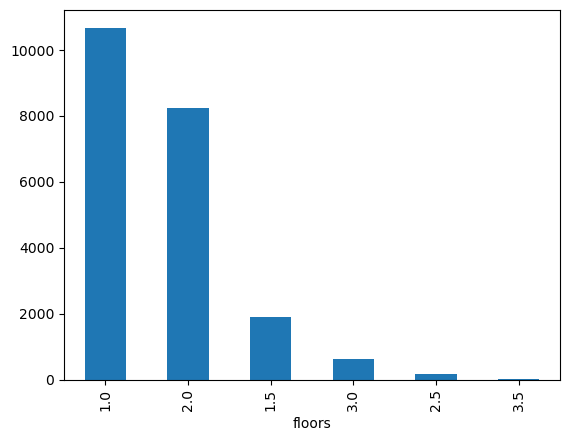

In [19]:
data.floors.value_counts().plot(kind='bar')

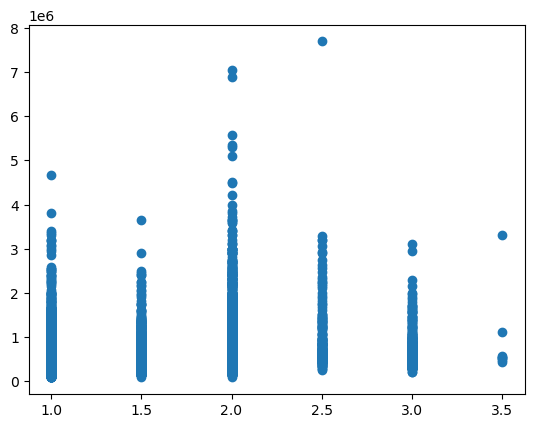

In [20]:
plt.scatter(data.floors,data.price)

In [21]:
plt.figure(figsize=(10,10))
sns.jointplot(x=data.lat.values, y=data.long.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
<Figure size 1000x1000

SyntaxError: invalid decimal literal (973695908.py, line 6)

<Figure size 1000x1000 with 0 Axes>

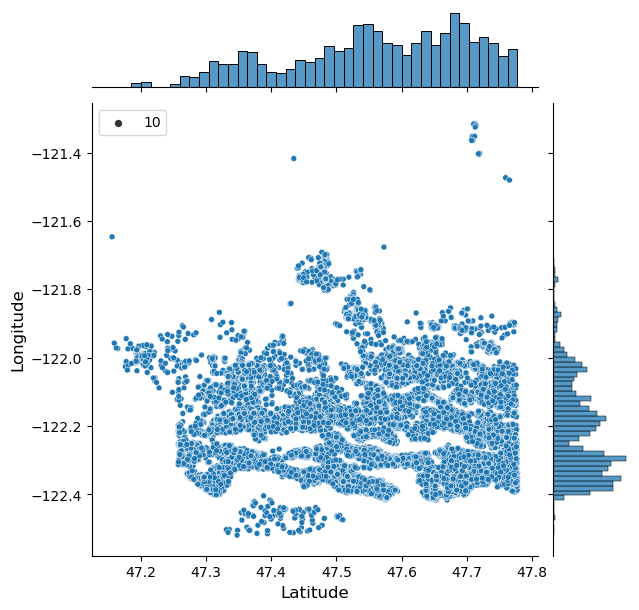

In [22]:
plt.figure(figsize=(10,10))
sns.jointplot(x=data.lat.values, y=data.long.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()